In [16]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
import random
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize


In [18]:
pip install scikit-image

In [19]:
import os
os.chdir("/content/drive/My Drive/inmas")

In [20]:
!pip3 install torch torchvision

In [21]:
files = os.listdir()

In [22]:
#base_path = ''
# We will save the base path to the patient folders, so that we can easily loop over them
patient_ids = files[2:]


In [23]:
ls

 10253/   10305/   12881/   13018/   14153/   16085/   8980/
 10254/   10306/   12882/   13019/   14154/   16165/   8984/
 10255/   10307/   12883/   13020/   14155/   16166/   9022/
 10256/   10308/   12884/   13021/   14156/   16167/   9023/
 10257/   12241/   12886/   13022/   14157/   16531/   9029/
 10258/   12242/   12890/   13023/   14188/   16532/   9035/
 10259/   12626/   12891/   13024/   14189/   16533/   9036/
 10260/   12748/   12892/   13025/   14190/   16534/   9037/
 10261/   12749/   12893/   13106/   14191/   16550/   9041/
 10262/   12750/   12894/   13400/   14192/   16551/   9043/
 10264/   12751/   12895/   13401/   14209/   16552/   9044/
 10268/   12752/   12896/   13402/   14210/   16553/   9073/
 10269/   12810/   12897/   13403/   14211/   16554/   9075/
 10272/   12811/   12898/   13404/   14212/   16555/   9076/
 10273/   12817/   12900/   13458/   14213/   16568/   9077/
 10274/   12818/   12901/   13459/   14304/   16569/   9078/
 10275/   12819/   12905

In [24]:
print(patient_ids) #number of patients

['10253', '10254', '10255', '10256', '10257', '10258', '10259', '10260', '10261', '10262', '10264', '10268', '10269', '10272', '10273', '10274', '10275', '10276', '10277', '10278', '10279', '10282', '10285', '10286', '10288', '10290', '10291', '10292', '10293', '10295', '10299', '10300', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '12241', '12242', '12626', '12748', '12749', '12750', '12751', '12752', '12810', '12811', '12817', '12818', '12819', '12820', '12821', '12822', '12823', '12824', '12826', '12867', '12868', '12869', '12870', '12871', '12872', '12873', '12875', '12876', '12877', '12878', '12879', '12880', '12881', '12882', '12883', '12884', '12886', '12890', '12891', '12892', '12893', '12894', '12895', '12896', '12897', '12898', '12900', '12901', '12905', '12906', '12907', '12908', '12909', '12910', '12911', '12929', '12930', '12931', '12932', '12933', '12934', '12935', '12947', '12948', '12949', '12951', '12954', '12955', '13018', '13019', '13020', 

In [25]:
class_0_total = 0
class_1_total = 0
from pprint import pprint
for patient_id in patient_ids:
    class_0_files = os.listdir(patient_id + '/0')
    class_1_files = os.listdir(patient_id + '/1')

    class_0_total += len(class_0_files)
    class_1_total += len(class_1_files) 
    if patient_ids.index(patient_id)%10==0:
      print(patient_id)

total_images = class_0_total + class_1_total
    
print(f'Number of patches in Class 0: {class_0_total}')
print(f'Number of patches in Class 1: {class_1_total}')
print(f'Total number of patches: {total_images}')

10253
10264
10279
10299
12241
12817
12868
12879
12893
12907
12934
13020
13403
13617
14078
14189
14305
15515
16085
16552
8950
8957
9036
9078
9178
Number of patches in Class 0: 164947
Number of patches in Class 1: 68252
Total number of patches: 233199


In [26]:
columns = ["patient_id",'x','y',"target","path"]
data_rows = []
i = 0
iss = 0
isss = 0

# note that we loop through the classes after looping through the 
# patient ids so that we avoid splitting our data into [all class 0 then all class 1]
for patient_id in patient_ids:
    for c in [0,1]:
        class_path = patient_id + '/' + str(c) + '/'
        imgs = os.listdir(class_path)
        
        # Extracting Image Paths
        img_paths = [class_path + img + '/' for img in imgs]
        
        # Extracting Image Coordinates
        img_coords = [img.split('_',4)[2:4] for img in imgs]
        x_coords = [int(coords[0][1:]) for coords in img_coords]
        y_coords = [int(coords[1][1:]) for coords in img_coords]

        for (path,x,y) in zip(img_paths,x_coords,y_coords):
            values = [patient_id,x,y,c,path]
            data_rows.append({k:v for (k,v) in zip(columns,values)})
# We create a new dataframe using the list of dicts that we generated above
data1 = pd.DataFrame(data_rows)

In [27]:
print(f'Shape of Dataframe: {data1.shape}')
data1[0:]

Shape of Dataframe: (233199, 5)


,patient_id,x,y,target,path
0,10253,1001,1001,0,10253/0/10253_idx5_x1001_y1001_class0.png/
1,10253,1101,1201,0,10253/0/10253_idx5_x1101_y1201_class0.png/
2,10253,1101,551,0,10253/0/10253_idx5_x1101_y551_class0.png/
3,10253,1101,1001,0,10253/0/10253_idx5_x1101_y1001_class0.png/
4,10253,1001,601,0,10253/0/10253_idx5_x1001_y601_class0.png/
...,...,...,...,...,...
233194,9135,951,2301,0,9135/0/9135_idx5_x951_y2301_class0.png/
233195,9135,851,501,0,9135/0/9135_idx5_x851_y501_class0.png/
233196,9135,951,551,0,9135/0/9135_idx5_x951_y551_class0.png/
233197,9135,751,2201,0,9135/0/9135_idx5_x751_y2201_class0.png/


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '% of patches with IDC')

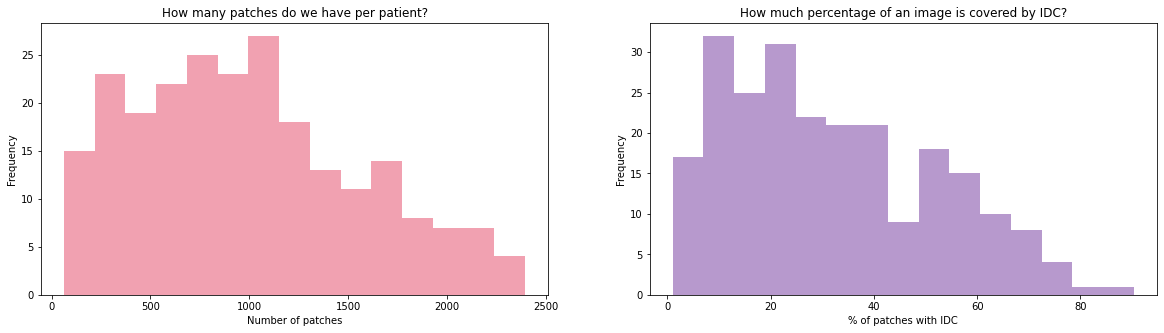

In [28]:
cancer_perc = data1.groupby("patient_id").target.value_counts()/ data1.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,2,figsize=(20,5))

# Plotting Frequency of Patches per Patient
sns.distplot(data1.groupby("patient_id").size(), ax=ax[0], color="crimson", kde=False, bins=15)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency")
ax[0].set_title("How many patches do we have per patient?")

# Plotting Percentage of an image that is covered by Invasive Ductile Carcinoma
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="indigo", kde=False, bins=15)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC")




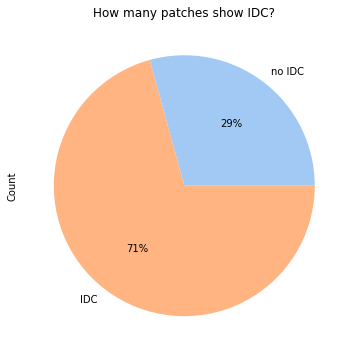

In [29]:
# Plotting number of patches that show IDC
fig, ax = plt.subplots(1,1,figsize=(6,6))
pnum=len(data1[data1.target==1])
nnum=len(data1[data1.target==0])
piedata = [float(pnum), float(nnum)]
labels = ['no IDC', 'IDC']
colors = sns.color_palette('pastel')
plt.pie(piedata, labels=labels ,colors = colors,autopct = '%0.0f%%')
plt.ylabel("Count")
plt.title("How many patches show IDC?");
plt.show()

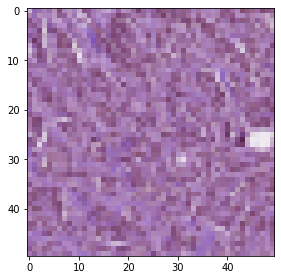

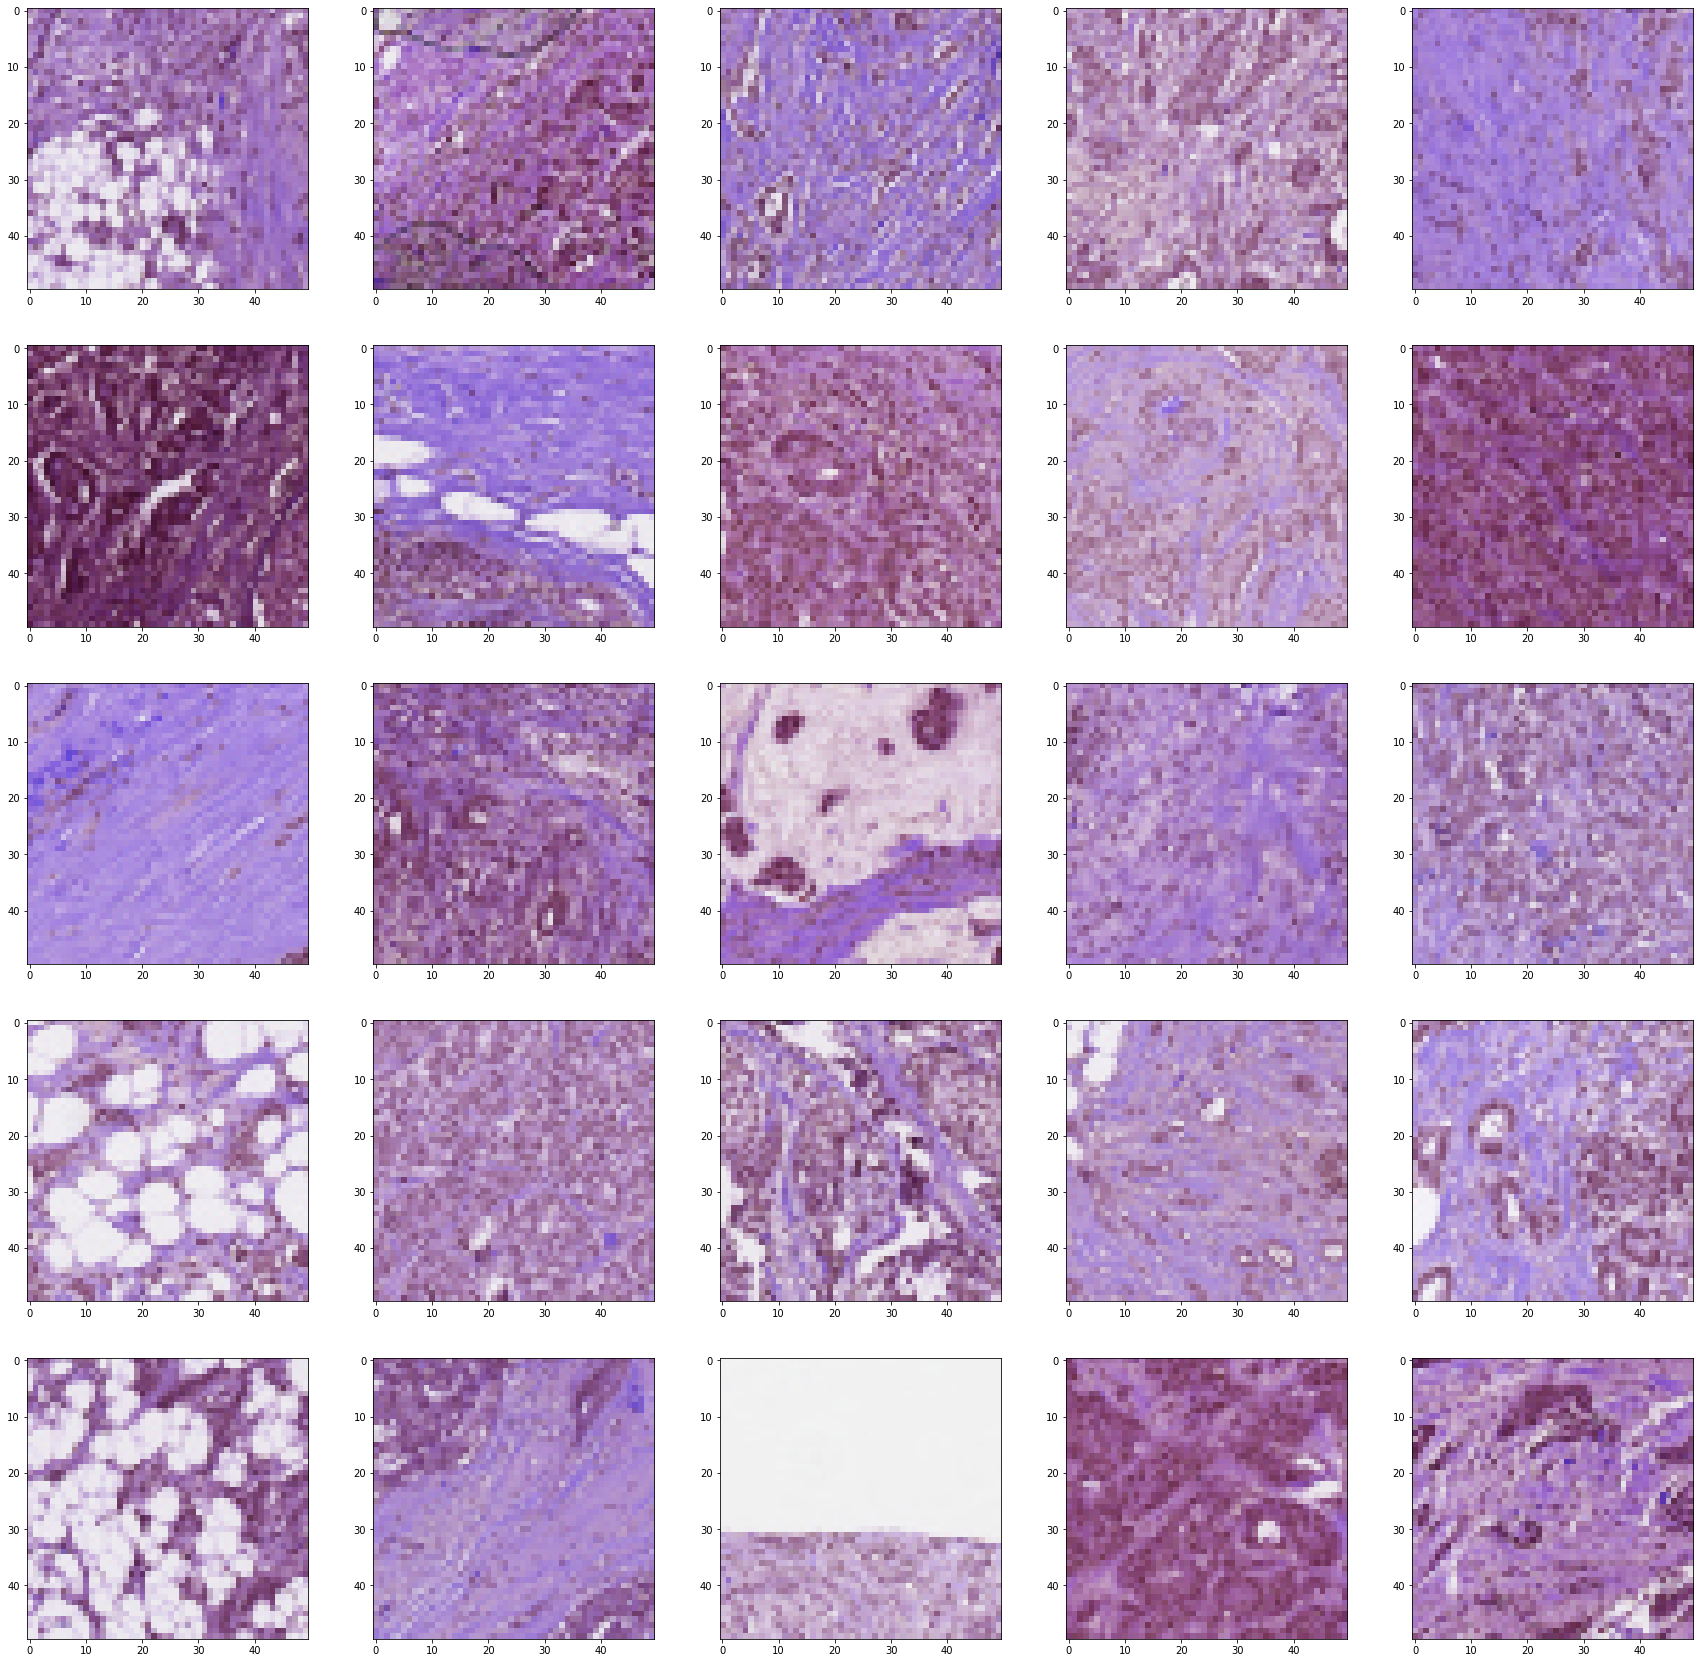

In [32]:
import cv2
from skimage import  data,io, segmentation, color
positive_tissue = np.random.choice(data1[data1.target==1].index.values, size=100, replace=False)
n_rows = 5
n_cols = 5
fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,30))

for row in range(n_rows):
    for col in range(n_cols):
        # below is a counter to cycle through the image indexes
        idx = positive_tissue[col + n_cols*row]
        img=cv2.imread(data1.loc[idx, "path"][:-1])
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)

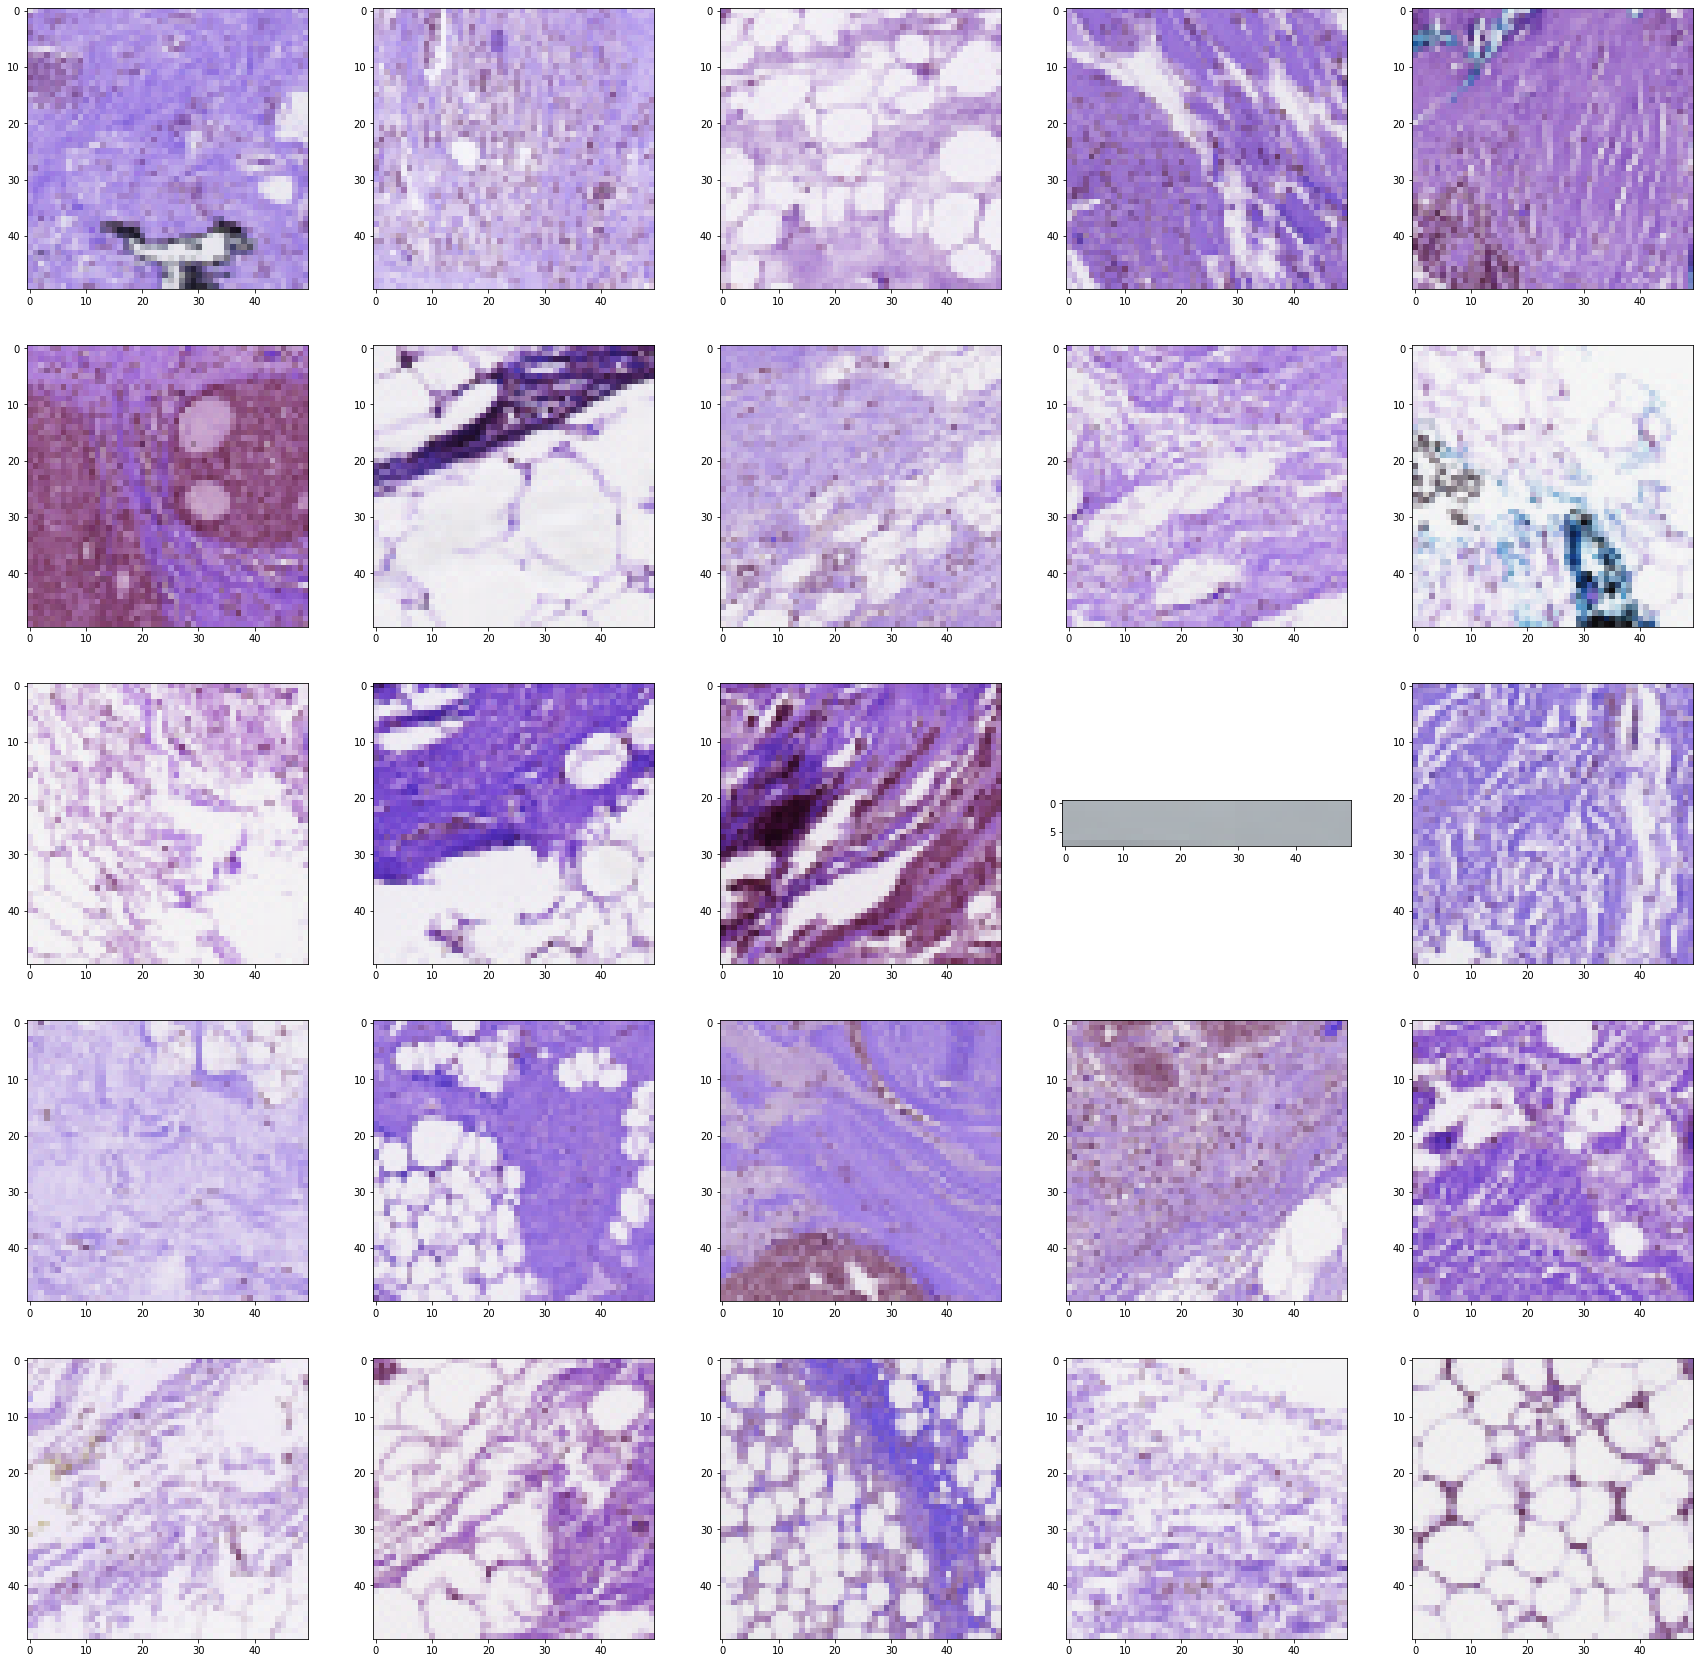

In [36]:
from skimage import  data,io, segmentation, color

negative_tissue = np.random.choice(data1[data1.target==0].index.values, size=100, replace=False)

n_rows = 5
n_cols = 5
fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,30))

for row in range(n_rows):
    for col in range(n_cols):
        # below is a counter to cycle through the image indexes
        idx = negative_tissue[col + n_cols*row]
        img = img=cv2.imread(data1.loc[idx, "path"][:-1])
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)

In [37]:
len(img[0])

50

In [38]:
from matplotlib.colors import ListedColormap
def get_patient_df(patient_id):
    return data1.loc[data1['patient_id']== str(patient_id),:]

In [39]:
print(data1['patient_id'])

0         10253
1         10253
2         10253
3         10253
4         10253
          ...  
233194     9135
233195     9135
233196     9135
233197     9135
233198     9135
Name: patient_id, Length: 233199, dtype: object


In [ ]:
data1['patient_id']

0         10253
1         10253
2         10253
3         10253
4         10253
          ...  
233194     9135
233195     9135
233196     9135
233197     9135
233198     9135
Name: patient_id, Length: 233199, dtype: object

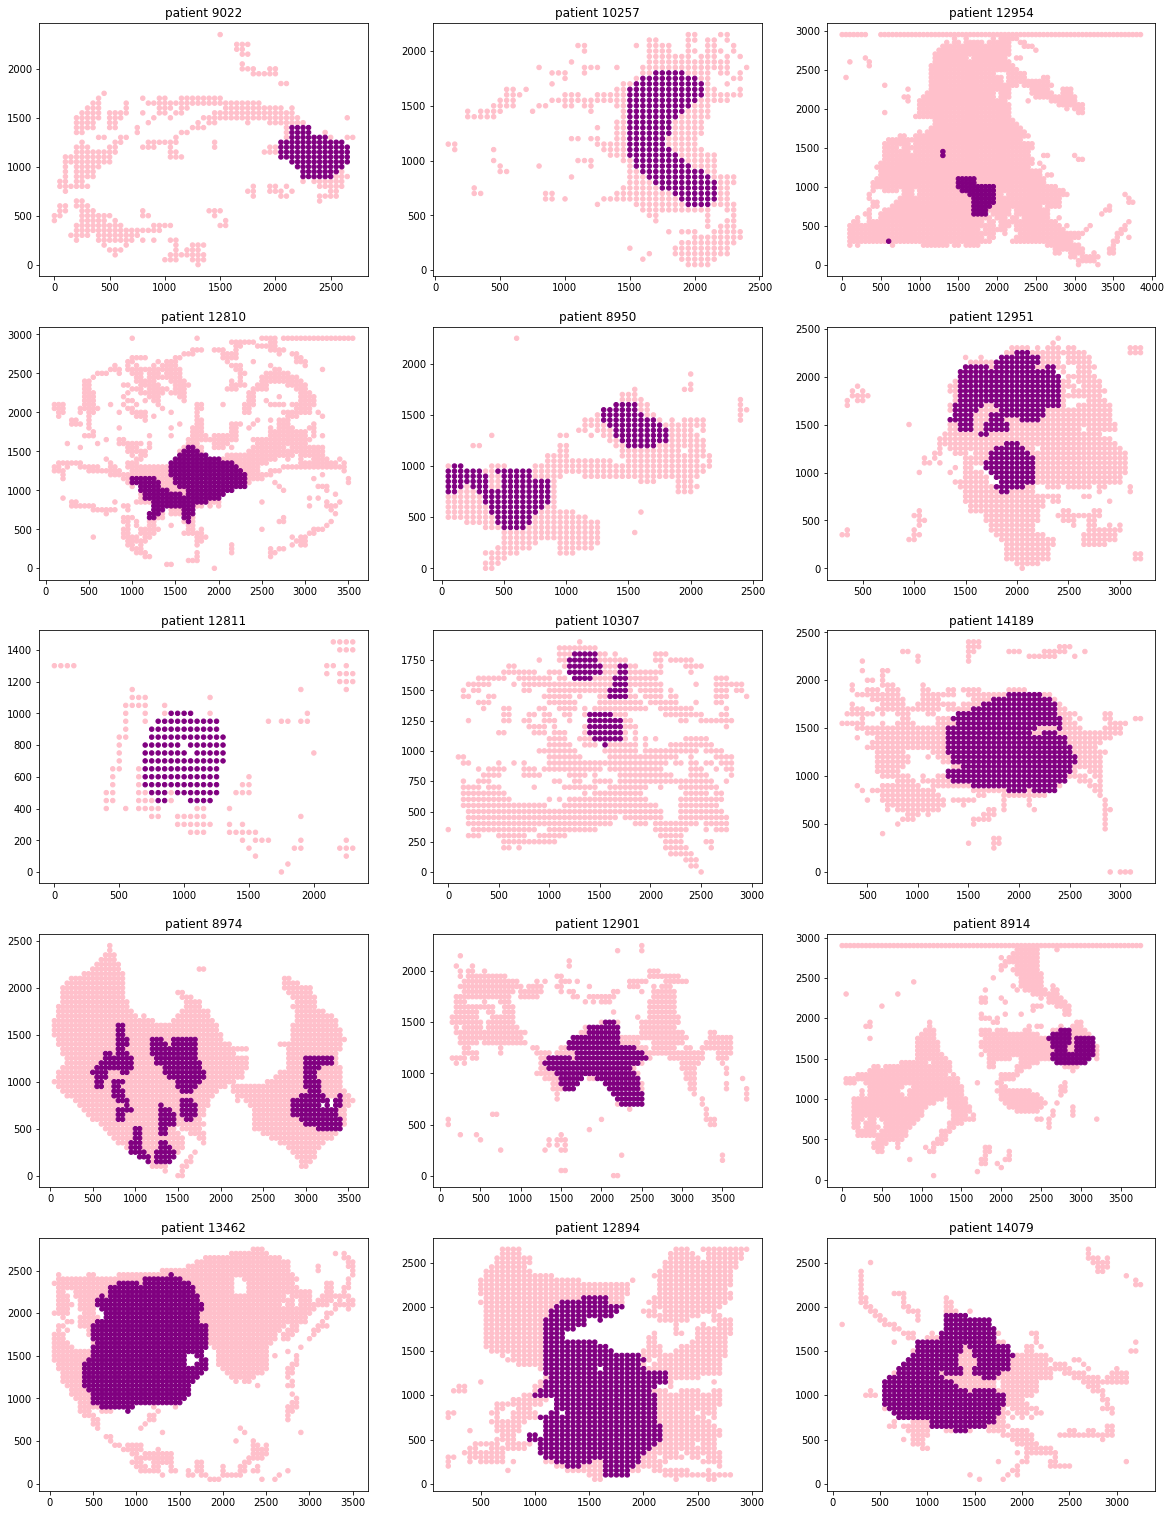

In [44]:
from seaborn.rcmod import axes_style
n_rows = 5
n_cols = 3
n_imgs = n_rows*n_cols
colors = ['pink', 'purple']

fig, ax = plt.subplots(n_rows,n_cols,figsize=(20, 27))

patient_ids = np.random.choice( data1.patient_id.unique(), size=n_imgs, replace=False)

for row in range(n_rows):
    for col in range(n_cols):
        patient_id = patient_ids[col + n_cols*row]
        patient_df = get_patient_df(patient_id)
        
        ax[row,col].scatter(patient_df.x.values, \
                            patient_df.y.values, \
                            c=patient_df.target.values,\
                            cmap=ListedColormap(colors), s=20)
        ax[row,col].set_title("patient " + patient_id)



In [ ]:
temp = get_patient_df(8863)
(temp['target']==1).sum()

207

In [47]:
def visualise_breast_tissue(patient_id, df = data1,pred = False, crop_dimension = [50,50]):
    # Plotting Settings
    plt.xticks([])
    plt.yticks([])
    # Get patient dataframe
    p_df = get_patient_df(patient_id)
    # Get the dimensions of the breast tissue image
    max_coord = np.max((*p_df.x,*p_df.y))
    # Allocate an array to fill image pixels in,use uint8 type as you don't need an int over 255
    grid = 255*np.ones(shape = (max_coord + crop_dimension[0], max_coord + crop_dimension[1], 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_coord + crop_dimension[0], max_coord + crop_dimension[1], 3)).astype(np.uint8)
    # Replace array values with values of the image
    for x,y,target,path in zip(p_df['x'],p_df['y'],p_df['target'],p_df['path']):
        try:
            img = cv2.imread(path[:-1])
            # Replace array values with cropped image values
            grid[y:y+crop_dimension[1],x:x+crop_dimension[0]] = img
            # Check if target is cancerous or not
            if target != 0:
                # If the target is cancerous then, replace array values with the color blue
                mask[y:y+crop_dimension[1],x:x+crop_dimension[0]] = [0,0,255]
        except: pass
    # if prediction is not specifies then show the image normally
    if pred == False:
        io.imshow(grid)
        img = grid
    # if prediction is specified then apply a mask to the areas that contain predicted cancerous cells
    else:
        # Specify the desired alpha value
        alpha = 0.7
        # This is step is very important, adding 2 numpy arrays sets the values to float64, which is why convert them back to uint8
        img = (mask * (1.0 - alpha) + grid * alpha).astype('uint8')
        io.imshow(img)
    return img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

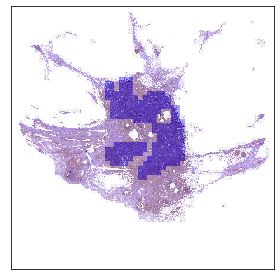

In [48]:
visualise_breast_tissue(8863,pred=True)

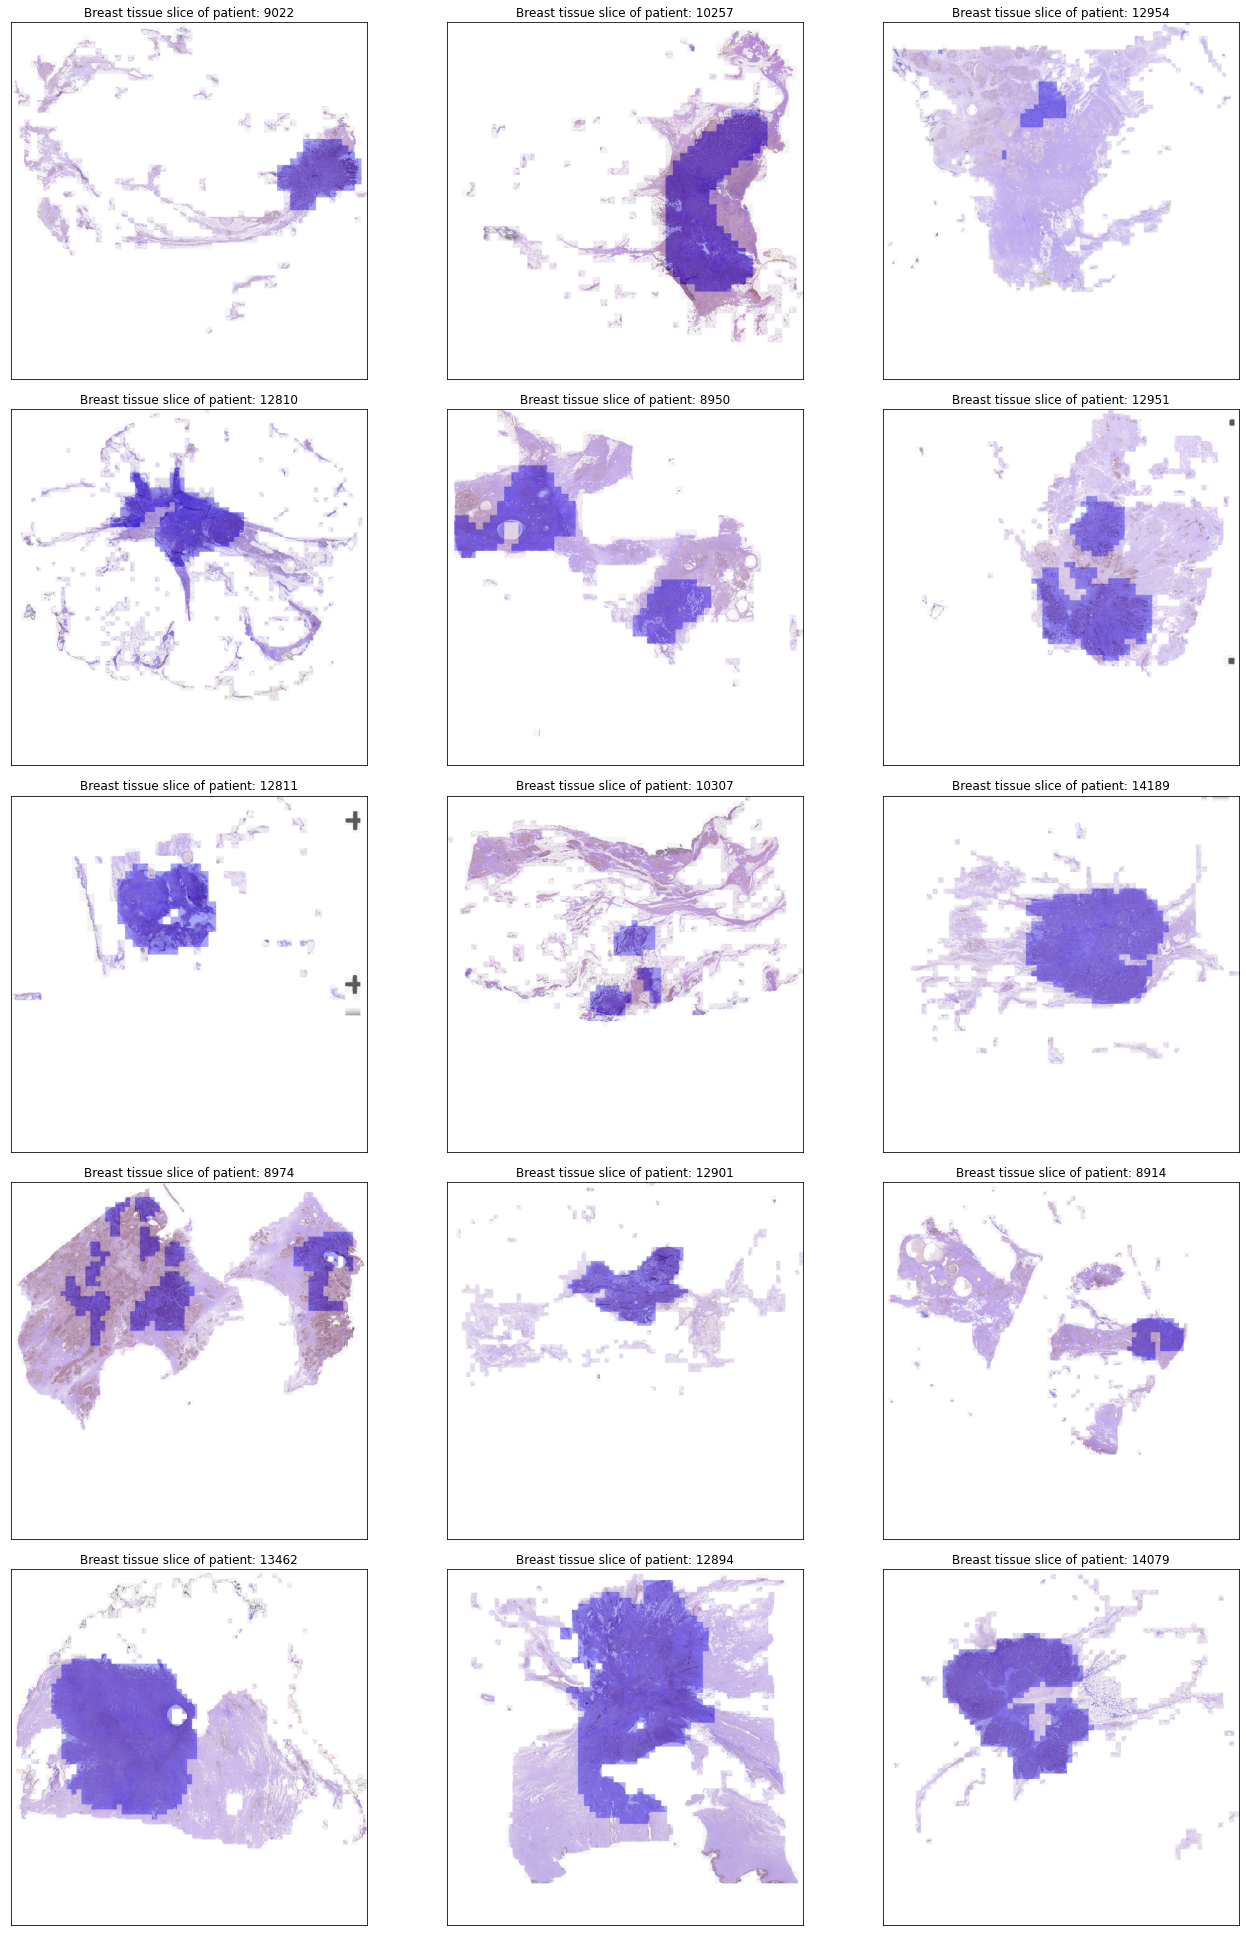

In [49]:
n_rows = 5
n_cols = 3
n_imgs = n_rows*n_cols

fig, ax = plt.subplots(n_rows,n_cols,figsize=(20, 27))

for row in range(n_rows):
    for col in range(n_cols):
        p_id = patient_ids[col + n_cols*row]
        
        img = visualise_breast_tissue(p_id, pred = True)
        ax[row,col].grid(False)
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])
        ax[row,col].set_title("Breast tissue slice of patient: " + p_id)        
        ax[row,col].imshow(img)


In [ ]:
n_rows = 5
n_cols = 3
n_imgs = n_rows*n_cols

fig, ax = plt.subplots(n_rows,n_cols,figsize=(20, 27))

for row in range(n_rows):
    for col in range(n_cols):
        p_id = patient_ids[col + n_cols*row + 2]
        
        img = visualise_breast_tissue(p_id, pred = True)
        ax[row,col].grid(False)
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])
        ax[row,col].set_title("Breast tissue slice of patient: " + p_id)        
        ax[row,col].imshow(img)